## Baseline Modeling


**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [Importing Libraries](#toc1_1_)    
- [Loading dataset](#toc2_)    
  - [Baseline SARIMAX model](#toc2_1_)    
  - [Baseline linear regression model](#toc2_2_)    
- [Conclusion](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=3
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_'></a>[Introduction](#toc0_)

In this notebook, we develop and evaluate baseline forecasting models for power consumption across different zones. We fit both a classical model like SARIMAX and a baseline linear regression model. Model performance is assessed using appropriate metrics and diagnostic plots, providing a foundation for comparison with more advanced modeling approaches in future work.

#### <a id='toc1_1_'></a>[Importing Libraries](#toc0_)

Importing necessary libraries for modeling.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ignore all warnings to avoid cluttering the output
import warnings
warnings.filterwarnings("ignore")

# set matplotlib global settings eg. figsize
plt.rcParams['figure.figsize'] = (8.0, 6.0) 

sns.set_style("darkgrid")  #Setting grid style in seaborn


### <a id='toc2_'></a>[Loading dataset](#toc0_)

Overview: Contains dataset after feature engineering and preprocessing.

Step: Importing the original 10 minute sampled data into a dataframe power_df and resampled hourly data into power_hourly.

In [5]:
power_df = pd.read_pickle('../data/power_df_preprocessed.pkl')

power_hourly = pd.read_pickle('../data/power_hourly_preprocessed.pkl')

power_hourly.head()

,Zone1_Power_Consumption,Zone2_Power_Consumption,Zone3_Power_Consumption,Temperature,Humidity,General_Diffuse_Flows,is_weekend
DateTime,,,,,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193,6.196833,75.066667,0.063500,1
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567,5.548833,77.583333,0.056833,1
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578,5.054333,78.933333,0.063000,1
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422,5.004333,77.083333,0.059833,1
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433,5.097667,74.050000,0.058000,1


### <a id='toc2_1_'></a>[Baseline SARIMAX model](#toc0_)

In this section, we will fit baseline SARIMAX model to the hourly-resampled power consumption data for each zone. We will use the exogenous weather features and select optimal model orders based on AIC and Out of Sample forecasting metrics like RMSE, MAPE. 

**Note:** All SARIMA models in this section are trained on the log-transformed power consumption values, as time series decomposition during EDA indicated multiplicative seasonality rather than additive.

**General Modeling Approach**

*Data*:
- Power consumption data is resampled to an hourly frequency.
- Exogenous weather features are included based on their correlation with the target variable.

*Forecasting Horizon*:
- 24 steps ahead (out-of-sample testing)

*Model Fitting Steps (for each zone)*:
- Split data into training and test sets (last 24 hours for testing).
- Apply log transformation on training series (to handle multiplicative seasonality).
- Fit candidate SARIMAX models using auto_arima with different exogenous feature sets. Model order ranges are guided by ACF/PACF analysis carried out during pre-processing.

*Model Evaluation*: 

Evaluate each model on two criteria:
- AIC (Akaike Information Criterion): balances fit and complexity.
- Out-of-Sample Forecasting Metrics: MAE, RMSE, MAPE to measure predictive performance.

Compare both metrics, but use RMSE-based selection for final choice as it ensures robustness in forecasting.

Finally, refit best SARIMAX model (RMSE-based) on training data and review residual diagnostics of the final model.


=== Zone1_Power_Consumption ===

Trying exogenous features: []
  AIC: -41275.20 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1817.54, RMSE: 1984.52, MAPE: 6.66%

Trying exogenous features: ['Temperature']
  AIC: -41063.17 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1566.16, RMSE: 1700.13, MAPE: 5.81%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows']
  AIC: -40640.90 | Order: (0, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 2324.86, RMSE: 2478.80, MAPE: 8.48%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows', 'Humidity']
  AIC: -40156.13 | Order: (0, 1, 0) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 2090.10, RMSE: 2257.95, MAPE: 7.62%

--- Model Selection Comparison for Zone1_Power_Consumption ---
Best by AIC: [] (AIC: -41275.20, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best by RMSE: ['Temperature'] (RMSE: 1700.13, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best forecast performance - M

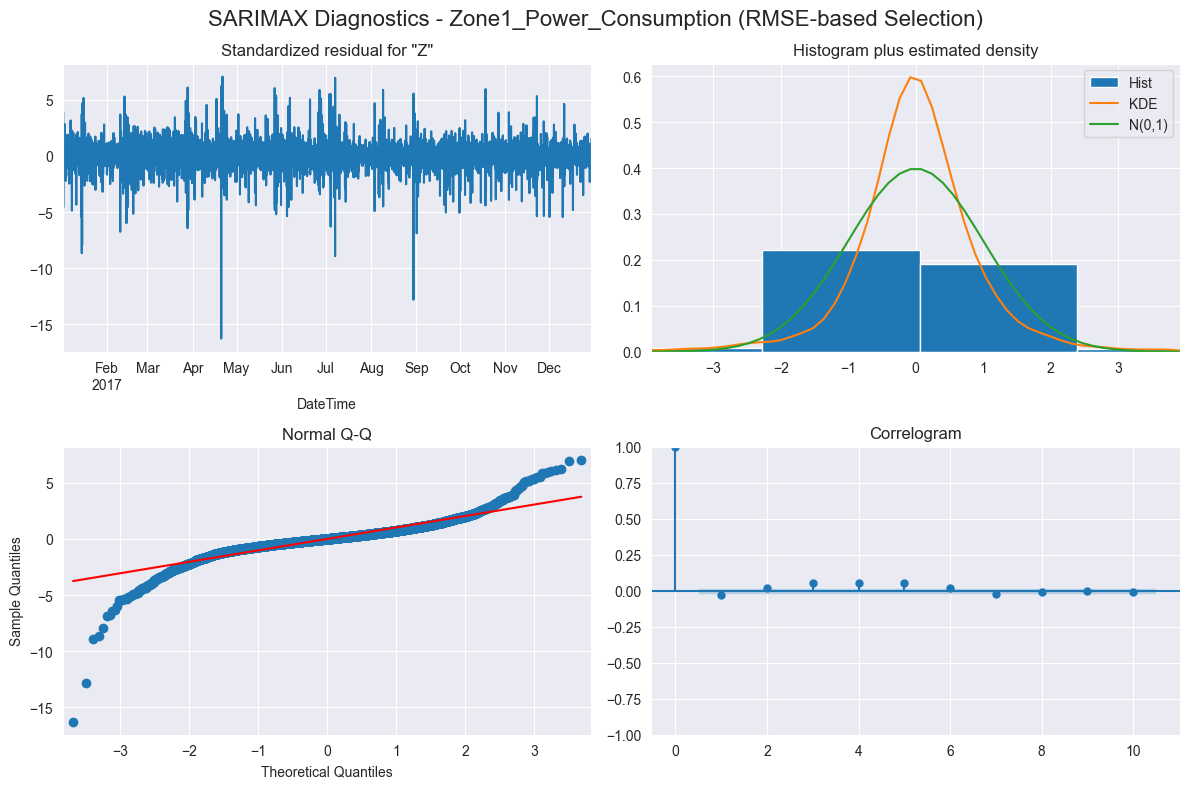

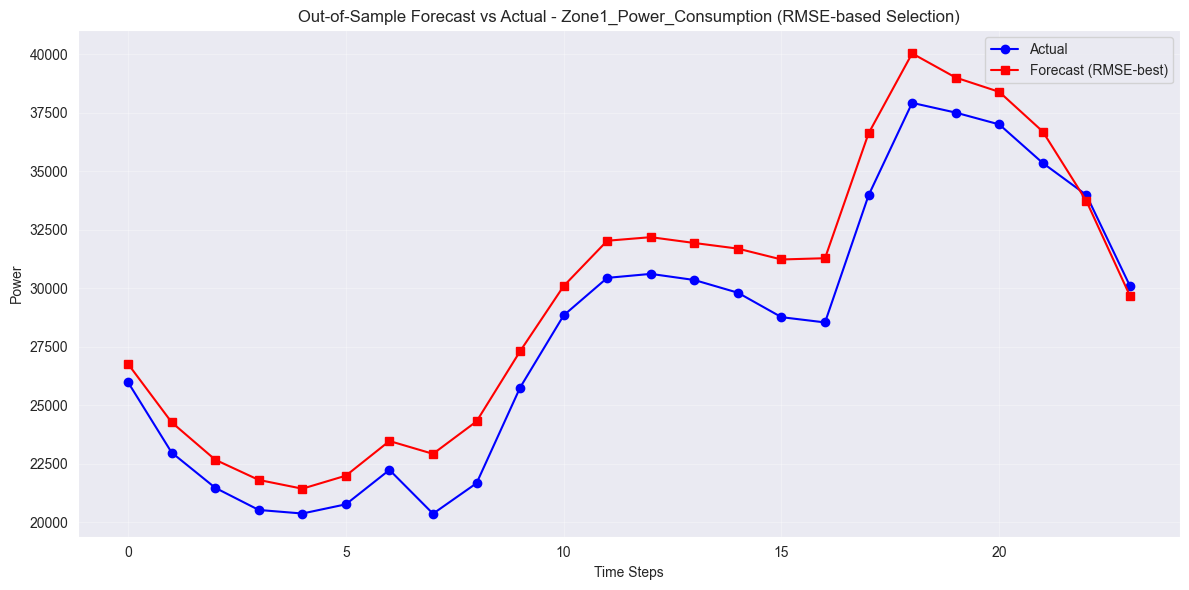


=== Zone2_Power_Consumption ===

Trying exogenous features: []
  AIC: -38752.36 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1358.01, RMSE: 1526.47, MAPE: 5.47%

Trying exogenous features: ['Temperature']
  AIC: -38646.44 | Order: (0, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1864.67, RMSE: 2045.75, MAPE: 7.55%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows']
  AIC: -38398.20 | Order: (0, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1853.30, RMSE: 1957.03, MAPE: 7.84%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows', 'Humidity']
  AIC: -38294.87 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 1872.12, RMSE: 1982.29, MAPE: 7.89%

--- Model Selection Comparison for Zone2_Power_Consumption ---
Best by AIC: [] (AIC: -38752.36, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best by RMSE: [] (RMSE: 1526.47, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best forecast performance - MAE: 1358.01, 

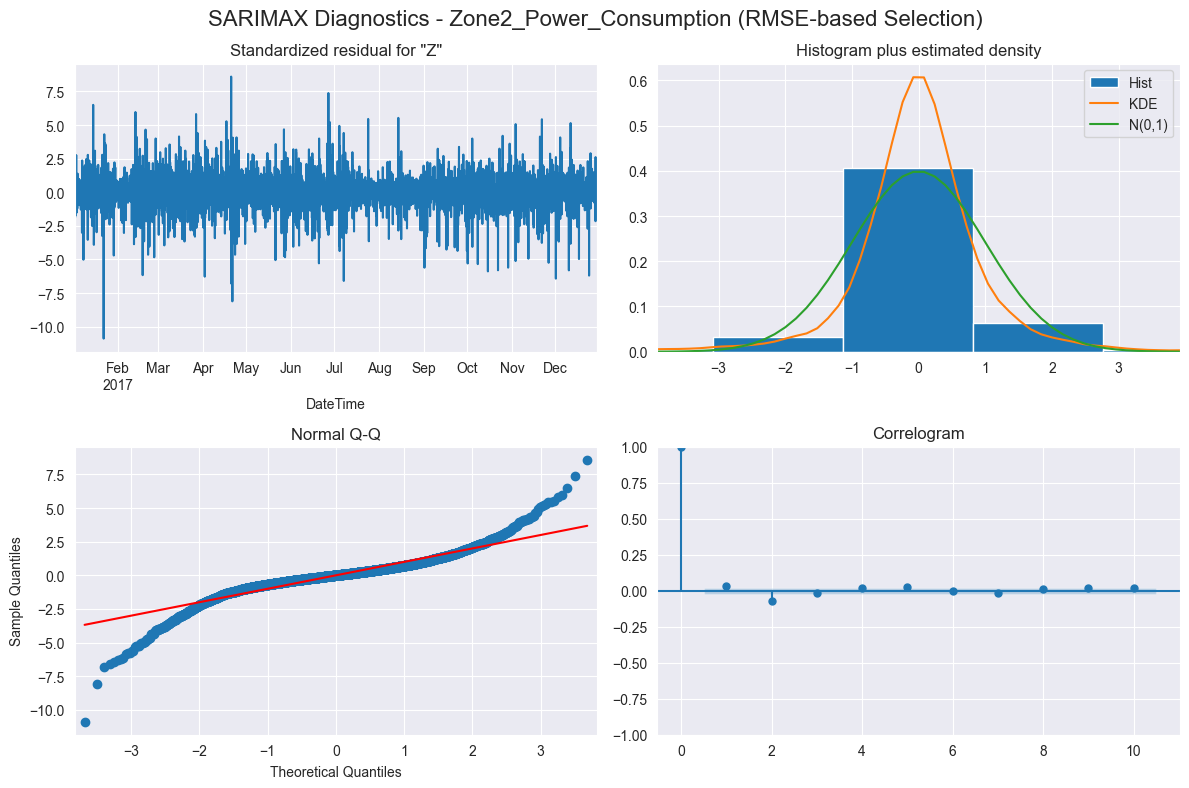

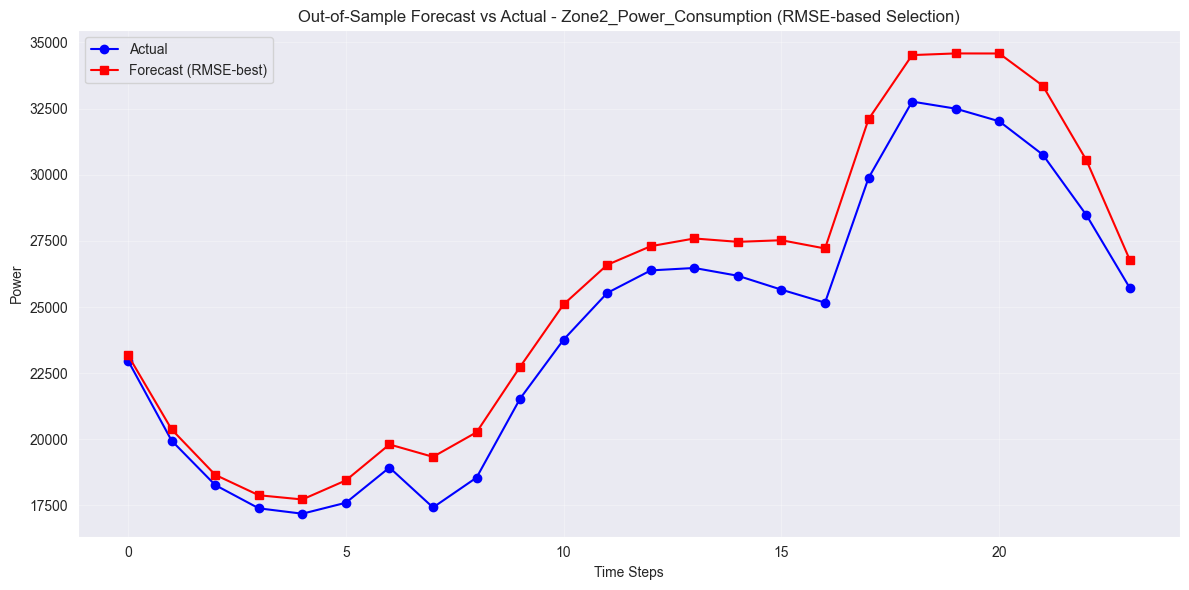


=== Zone3_Power_Consumption ===

Trying exogenous features: []
  AIC: -39507.00 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 322.64, RMSE: 416.67, MAPE: 2.65%

Trying exogenous features: ['Temperature']
  AIC: -39222.30 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 266.41, RMSE: 305.85, MAPE: 2.47%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows']
  AIC: -38997.06 | Order: (2, 1, 1) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 274.09, RMSE: 328.85, MAPE: 2.82%

Trying exogenous features: ['Temperature', 'General_Diffuse_Flows', 'Humidity']
  AIC: -38657.76 | Order: (0, 1, 0) | Seasonal: (1, 0, 1, 24)
  Out-of-sample - MAE: 262.80, RMSE: 314.12, MAPE: 2.70%

--- Model Selection Comparison for Zone3_Power_Consumption ---
Best by AIC: [] (AIC: -39507.00, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best by RMSE: ['Temperature'] (RMSE: 305.85, Order: (2, 1, 1), Seasonal: (1, 0, 1, 24))
Best forecast performance - MAE: 266.4

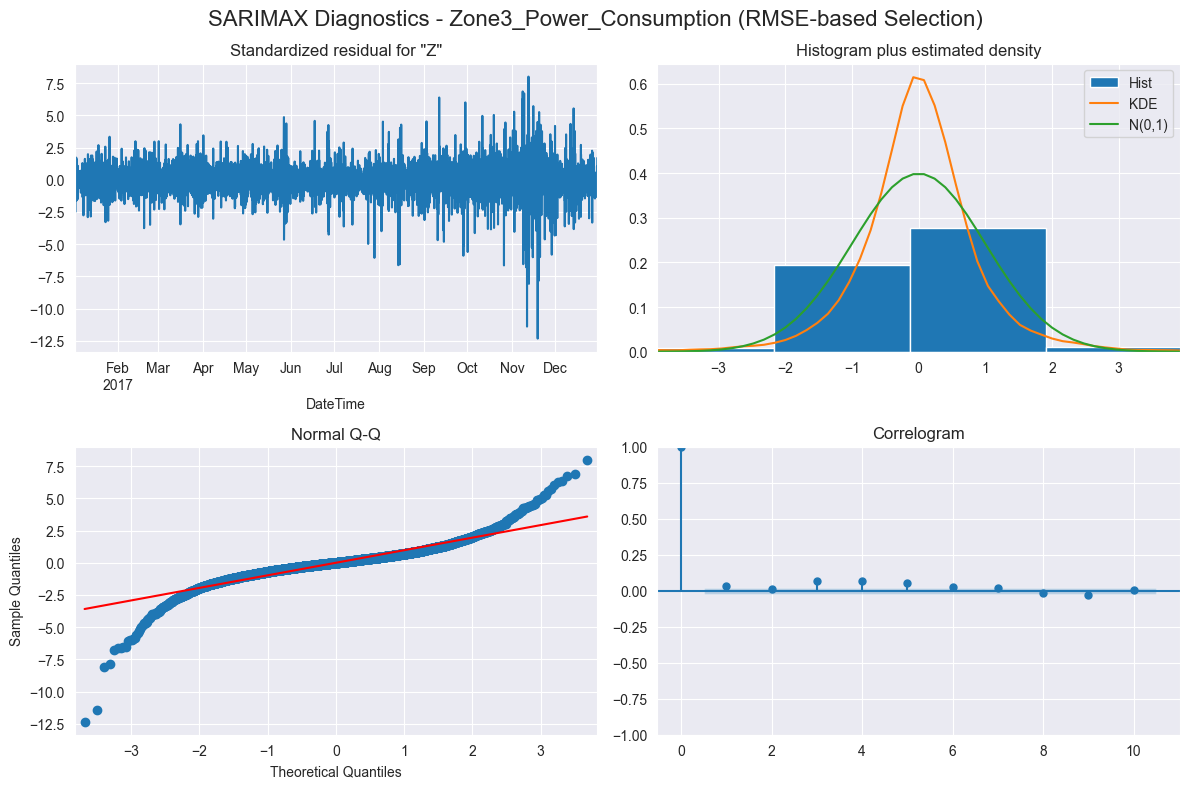

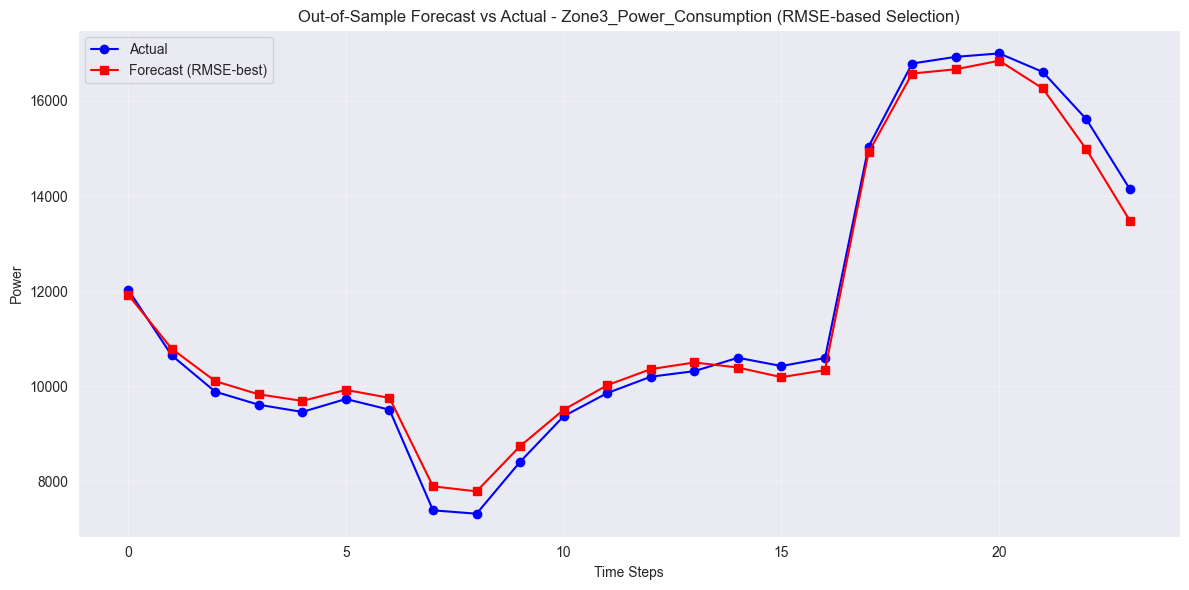

In [ ]:
zones = ['Zone1_Power_Consumption', 'Zone2_Power_Consumption', 'Zone3_Power_Consumption']

# Define exogenous feature sets in the order of decreasing correlation values with the target
exog_feature_sets = [
    [],
    ['Temperature'],
   ['Temperature', 'General_Diffuse_Flows'],
   ['Temperature', 'General_Diffuse_Flows', 'Humidity']
]

forecast_steps = 24  # Number of steps ahead to forecast

for zone in zones:
    print(f"\n=== {zone} ===")
    y = power_hourly[zone]
    
    # Split data for out-of-sample testing
    split_point = len(y) - forecast_steps
    y_train = y.iloc[:split_point]
    y_test = y.iloc[split_point:]
    y_log_train = np.log(y_train)  # Use log-transformed target for training

    # Track both AIC-based and forecast-based best models
    best_aic = float('inf')
    best_rmse = float('inf')
    best_model_aic = None
    best_model_forecast = None
    best_features_aic = []
    best_features_forecast = []
    best_exog_aic = None
    best_exog_forecast = None
    best_order_aic = None
    best_order_forecast = None
    best_seasonal_order_aic = None
    best_seasonal_order_forecast = None
    best_forecast_metrics = None

    for features in exog_feature_sets:
        if not features:
            exog_train = None
            exog_test = None
        else:
            exog_train = power_hourly.loc[y_train.index, features]
            exog_test = power_hourly.loc[y_test.index, features]

        print(f"\nTrying exogenous features: {features}")
        try:
            model = pm.auto_arima(
                y_log_train,
                X=exog_train,
                seasonal=True,
                m=24,
                stepwise=True,
                suppress_warnings=True,
                error_action='ignore',
                start_p=0, max_p=2,
                start_q=0, max_q=1,
                start_P=0, max_P=1,
                start_Q=0, max_Q=1,
                max_d=1,
                max_D=1,
                trace=False,
            )
            
            # Generate out-of-sample forecasts 
            forecast_log = model.predict(n_periods=forecast_steps, X=exog_test)
            forecast_original = np.exp(forecast_log)  # Transform back to original scale
            
            # Calculate forecast metrics
            mae = np.mean(np.abs(forecast_original - y_test))
            rmse = np.sqrt(np.mean((forecast_original - y_test)**2))
            mape = np.mean(np.abs((forecast_original - y_test) / y_test)) * 100
            
            print(f"  AIC: {model.aic():.2f} | Order: {model.order} | Seasonal: {model.seasonal_order}")
            print(f"  Out-of-sample - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

            # Track best model by AIC
            if model.aic() < best_aic:
                best_aic = model.aic()
                best_model_aic = model
                best_exog_aic = exog_train
                best_order_aic = model.order
                best_seasonal_order_aic = model.seasonal_order
                best_features_aic = features
            
            # Track best model by RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_model_forecast = model
                best_exog_forecast = exog_train
                best_order_forecast = model.order
                best_seasonal_order_forecast = model.seasonal_order
                best_features_forecast = features
                best_forecast_metrics = {
                    'mae': mae, 'rmse': rmse, 'mape': mape,
                    'forecast': forecast_original, 'actual': y_test
                }
                
        except Exception as e:
            print(f"  Failed for features {features}: {e}")

    # Compare both selection methods
    print(f"\n--- Model Selection Comparison for {zone} ---")
    print(f"Best by AIC: {best_features_aic} (AIC: {best_aic:.2f}, Order: {best_order_aic}, Seasonal: {best_seasonal_order_aic})")
    print(f"Best by RMSE: {best_features_forecast} (RMSE: {best_rmse:.2f}, Order: {best_order_forecast}, Seasonal: {best_seasonal_order_forecast})")
    
    if best_forecast_metrics:
        print(f"Best forecast performance - MAE: {best_forecast_metrics['mae']:.2f}, "
              f"RMSE: {best_forecast_metrics['rmse']:.2f}, MAPE: {best_forecast_metrics['mape']:.2f}%")

    # Choose which model to use for final analysis (using RMSE-based selection)
    final_model = best_model_forecast
    final_exog = best_exog_forecast
    final_order = best_order_forecast
    final_seasonal_order = best_seasonal_order_forecast
    final_features = best_features_forecast
    
    print(f"\nUsing RMSE-based selection for final model: {final_features}")

    # Fit SARIMAX with forecast-based best model
    sarimax = SARIMAX(
        y_log_train,
        exog=final_exog,
        order=final_order,
        seasonal_order=final_seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = sarimax.fit(disp=False)
    print(res.summary())

    print(f"\nDiagnostics for best SARIMAX model (RMSE-based) for {zone}:")
    res.plot_diagnostics(figsize=(12, 8))
    plt.suptitle(f"SARIMAX Diagnostics - {zone} (RMSE-based Selection)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Plot actual vs forecast comparison
    if best_forecast_metrics:
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(best_forecast_metrics['actual'])), best_forecast_metrics['actual'], 
                 'o-', label='Actual', color='blue')
        plt.plot(range(len(best_forecast_metrics['forecast'])), best_forecast_metrics['forecast'], 
                 's-', label='Forecast (RMSE-best)', color='red')
        plt.title(f'Out-of-Sample Forecast vs Actual - {zone} (RMSE-based Selection)')
        plt.xlabel('Time Steps')
        plt.ylabel('Power')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

Key Insights:
- SARIMA models with seasonal (24-hour) structure fit all zones well, with best performance for Zone 3 (lowest errors, best fit).
- Adding Temperature as an exogenous variable improves forecast accuracy for Zones 1 and 3.
- Residuals in all models show some deviations from normality (heavy tails as seen in Q-Q plot), but autocorrelation is strongly reduced(correlogram), suggesting a good temporal fit.
- Models were evaluated using both AIC and RMSE. AIC provides a measure of model fit and complexity, while RMSE directly reflects out-of-sample forecast accuracy. For forecasting tasks, RMSE-based selection is generally preferred as it prioritizes predictive performance on unseen data.

### <a id='toc2_2_'></a>[Baseline linear regression model](#toc0_)

For each power consumption zone, we fit a baseline Linear Regression model using the engineered lag, rolling statistics and exogeneous features. 

Before fitting, the data was split into training and test sets with a time series split to preserve temporal order. 

Model performance metrics were computed, and diagnostic plots were generated to evaluate model residuals and feature importances. 

In [6]:
# Create separate DataFrames for each zone with only relevant features

# List of all possible features (adjust as needed for your modeling)
base_features = [
    'Temperature', 'Humidity', 'Wind_Speed', 'General_Diffuse_Flows', 'Diffuse_Flows',
    'is_weekend', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Month'
]

# Add rolling/lagged features for each zone
zone1_features = base_features + [col for col in power_df.columns if col.startswith('Zone1_Power_Consumption')]
zone2_features = base_features + [col for col in power_df.columns if col.startswith('Zone2_Power_Consumption')]
zone3_features = base_features + [col for col in power_df.columns if col.startswith('Zone3_Power_Consumption')]

#Creating separate dataframes per zone
zone1_df = power_df[zone1_features].copy()
zone2_df = power_df[zone2_features].copy()
zone3_df = power_df[zone3_features].copy()


Linear Regression (5-fold TimeSeriesSplit) for Zone1_Power_Consumption
  Split 1: R²=0.9945, Adj R²=0.9945, RMSE=493.12, MAE=297.37
  Split 2: R²=0.9955, Adj R²=0.9955, RMSE=476.25, MAE=321.64
  Split 3: R²=0.9954, Adj R²=0.9954, RMSE=474.20, MAE=290.49
  Split 4: R²=0.9964, Adj R²=0.9964, RMSE=392.11, MAE=262.38
  Split 5: R²=0.9963, Adj R²=0.9963, RMSE=366.24, MAE=240.34

Aggregated Metrics (mean across splits):
R²: 0.9956
Adjusted R²: 0.9956
RMSE: 440.38
MAE: 282.44
AIC: 106006.88
BIC: 106211.98


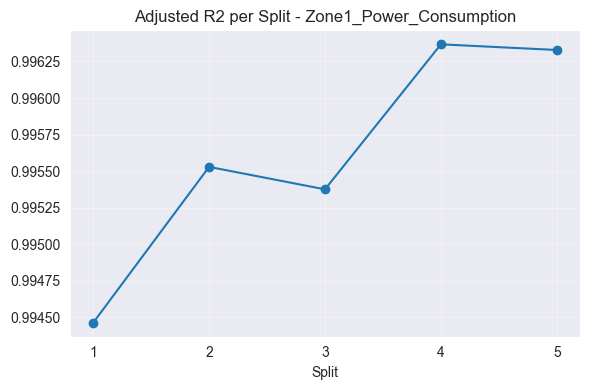


Linear Regression (5-fold TimeSeriesSplit) for Zone2_Power_Consumption
  Split 1: R²=0.9945, Adj R²=0.9945, RMSE=299.57, MAE=211.81
  Split 2: R²=0.9949, Adj R²=0.9949, RMSE=307.90, MAE=215.63
  Split 3: R²=0.9963, Adj R²=0.9963, RMSE=305.45, MAE=202.80
  Split 4: R²=0.9963, Adj R²=0.9962, RMSE=270.20, MAE=186.49
  Split 5: R²=0.9966, Adj R²=0.9966, RMSE=326.20, MAE=203.43

Aggregated Metrics (mean across splits):
R²: 0.9957
Adjusted R²: 0.9957
RMSE: 301.87
MAE: 204.04
AIC: 99516.34
BIC: 99721.44


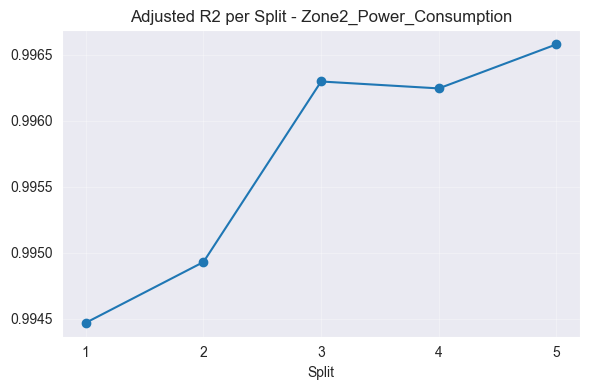


Linear Regression (5-fold TimeSeriesSplit) for Zone3_Power_Consumption
  Split 1: R²=0.9965, Adj R²=0.9964, RMSE=266.12, MAE=182.88
  Split 2: R²=0.9953, Adj R²=0.9953, RMSE=361.27, MAE=255.24
  Split 3: R²=0.9976, Adj R²=0.9976, RMSE=343.16, MAE=222.27
  Split 4: R²=0.9944, Adj R²=0.9944, RMSE=251.69, MAE=168.81
  Split 5: R²=0.9928, Adj R²=0.9927, RMSE=283.08, MAE=174.81

Aggregated Metrics (mean across splits):
R²: 0.9953
Adjusted R²: 0.9953
RMSE: 301.06
MAE: 200.80
AIC: 99325.00
BIC: 99530.10


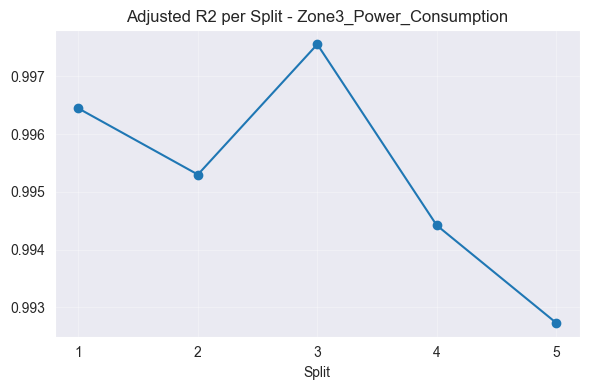

In [16]:
# Baseline linear regression for each zone using its relevant features

zone_dfs = {
    'Zone1_Power_Consumption': zone1_df,
    'Zone2_Power_Consumption': zone2_df,
    'Zone3_Power_Consumption': zone3_df
}

results = {}
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits

for zone, df in zone_dfs.items():
    print(f"\n{'='*50}")
    print(f"Linear Regression (5-fold TimeSeriesSplit) for {zone}")
    print(f"{'='*50}")

    y = df[zone]
    X = df.drop(columns=[zone])

    # Store metrics for each split
    split_metrics = {
        'r2': [], 'adjusted_r2': [], 'rmse': [], 'mae': [], 'aic': [], 'bic': []
    }

    for split_num, (train_index, test_index) in enumerate(tscv.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale features only on training data to avoid data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        # Predict on test set
        y_pred = model.predict(X_test_scaled)
        residuals = y_test - y_pred

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        p = X_train.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        aic_lr = n * np.log(mse) + 2 * (p + 1)
        bic_lr = n * np.log(mse) + (p + 1) * np.log(n)

        split_metrics['r2'].append(r2)
        split_metrics['adjusted_r2'].append(adjusted_r2)
        split_metrics['rmse'].append(rmse)
        split_metrics['mae'].append(mae)
        split_metrics['aic'].append(aic_lr)
        split_metrics['bic'].append(bic_lr)

        print(f"  Split {split_num}: R²={r2:.4f}, Adj R²={adjusted_r2:.4f}, RMSE={rmse:.2f}, MAE={mae:.2f}")

    # Aggregate metrics
    agg_metrics = {k: np.mean(v) for k, v in split_metrics.items()}
    results[zone] = agg_metrics

    print("\nAggregated Metrics (mean across splits):")
    print(f"R²: {agg_metrics['r2']:.4f}")
    print(f"Adjusted R²: {agg_metrics['adjusted_r2']:.4f}")
    print(f"RMSE: {agg_metrics['rmse']:.2f}")
    print(f"MAE: {agg_metrics['mae']:.2f}")
    print(f"AIC: {agg_metrics['aic']:.2f}")
    print(f"BIC: {agg_metrics['bic']:.2f}")

    # Plot all metrics for 5 splits
    metrics_to_plot = ['adjusted_r2']
    plt.figure(figsize=(6, 4))
    for metric in metrics_to_plot:
        plt.plot(range(1, len(split_metrics[metric]) + 1), split_metrics[metric], marker='o', label=metric.upper())
    plt.title(f"Adjusted R2 per Split - {zone}")
    plt.xlabel("Split")
    plt.xticks(range(1, len(split_metrics[metrics_to_plot[0]]) + 1))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Key Insights:
- Adjusted R² values across all splits and all zones are very high (above 0.99), which indicates strong overall predictive accuracy of the linear regression models for each zone's power consumption.
- Zone 1 and 2 show an upward trend in adjusted R² across splits. This suggests that as the model is trained on more recent data, its ability to explain variance in the test set actually improves. This could indicate stable or increasingly strong relationships between predictors and target in these zones over time.
- Zone 3 displays a different pattern: adjusted R² increases to a peak in the third split but then declines across the last two splits. This suggests a possible shift in data characteristics or relationships in Zone 3’s most recent period, causing the linear regression model to perform slightly worse. Potential causes include emerging trends, structural changes, or anomalies in the recent data for this zone.

In [17]:
# Summary comparison
print(f"\n{'='*80}")
print("LINEAR REGRESSION MODEL COMPARISON (Aggregated over 5 splits)")
print(f"{'='*80}")
print(f"{'Zone':<25} {'R²':<8} {'Adj_R²':<8} {'RMSE':<10} {'MAE':<10} {'AIC':<10} {'BIC':<10}")
print("-" * 80)
for zone in zone_dfs.keys():
    if zone in results:
        r = results[zone]
        print(f"{zone:<25} {r['r2']:<8.4f} {r['adjusted_r2']:<8.4f} {r['rmse']:<10.2f} {r['mae']:<10.2f} {r['aic']:<10.2f} {r['bic']:<10.2f}")


LINEAR REGRESSION MODEL COMPARISON (Aggregated over 5 splits)
Zone                      R²       Adj_R²   RMSE       MAE        AIC        BIC       
--------------------------------------------------------------------------------
Zone1_Power_Consumption   0.9956   0.9956   440.38     282.44     106006.88  106211.98 
Zone2_Power_Consumption   0.9957   0.9957   301.87     204.04     99516.34   99721.44  
Zone3_Power_Consumption   0.9953   0.9953   301.06     200.80     99325.00   99530.10  



Refitting Linear Regression on Full Training Data for Zone1_Power_Consumption


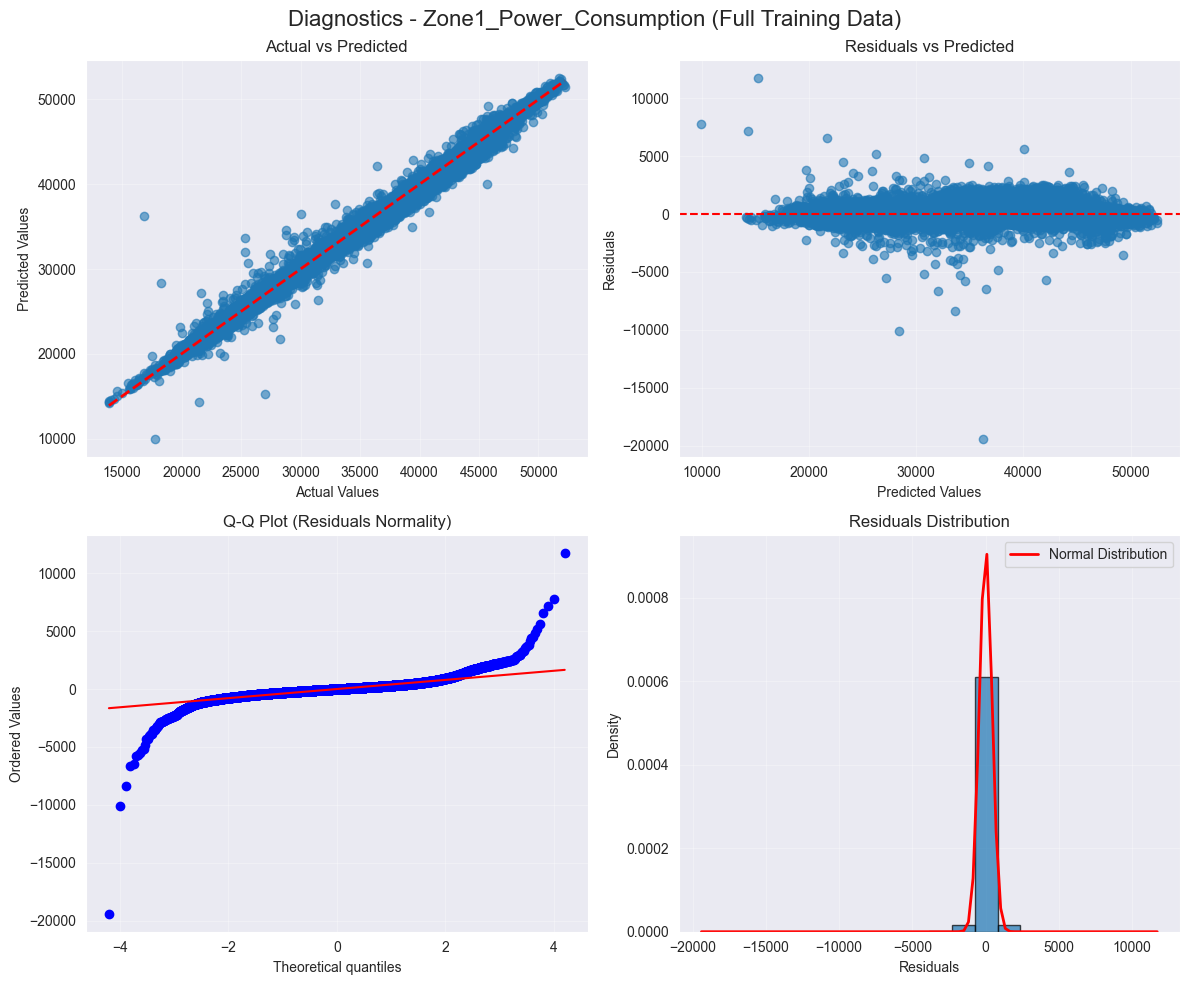

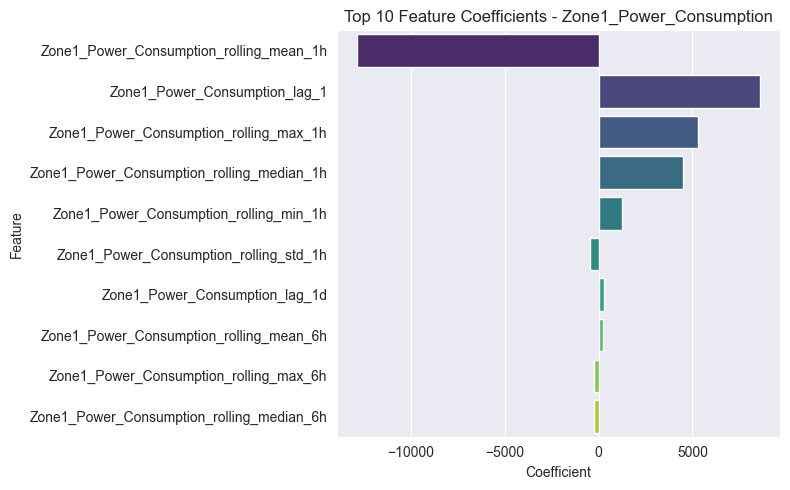


Refitting Linear Regression on Full Training Data for Zone2_Power_Consumption


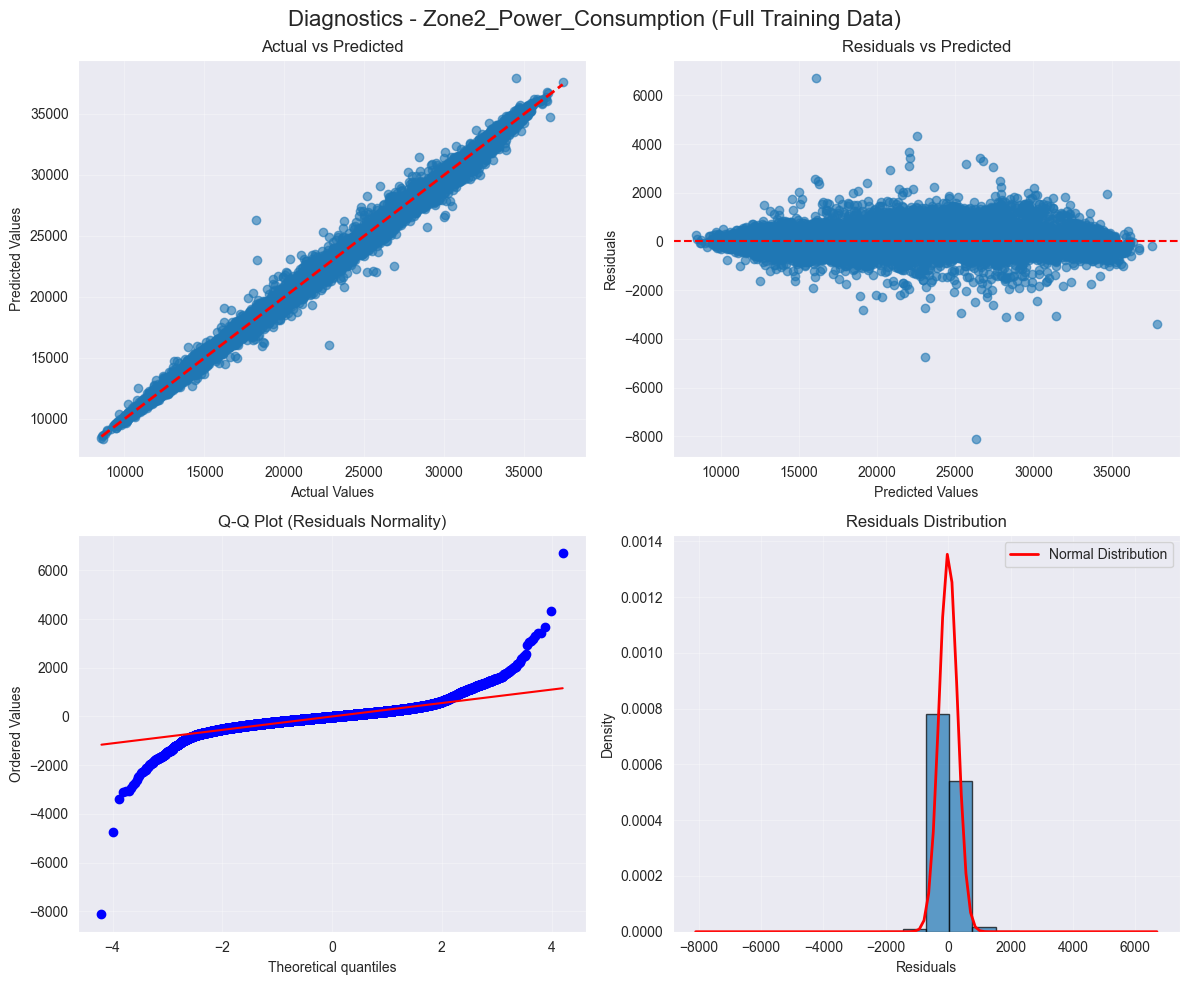

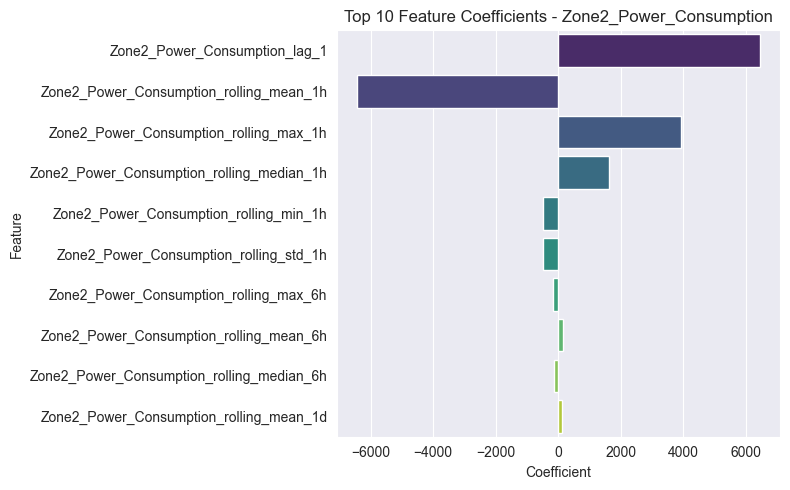


Refitting Linear Regression on Full Training Data for Zone3_Power_Consumption


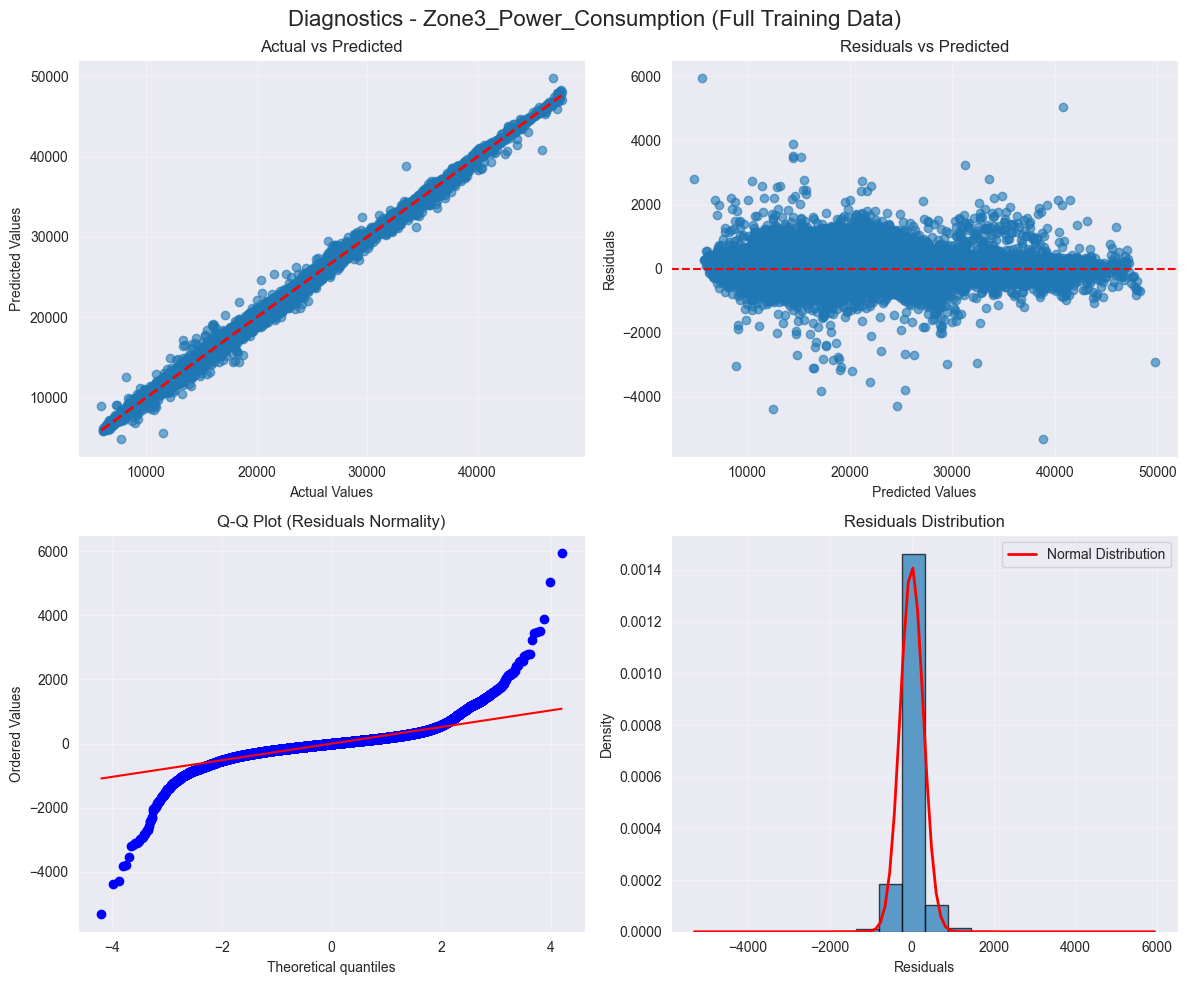

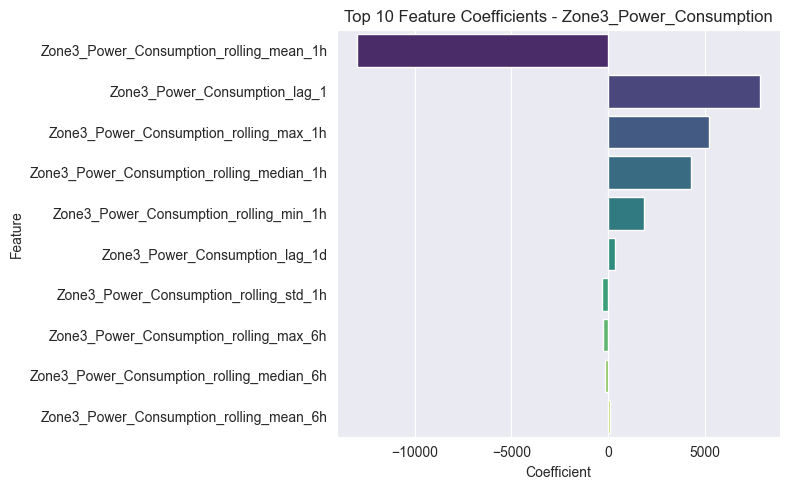

In [21]:
# Refit a linear regression model on the entire dataset for each zone and plot diagnostics

for zone, df in zone_dfs.items():
    print(f"\n{'='*50}")
    print(f"Refitting Linear Regression on Full Training Data for {zone}")
    print(f"{'='*50}")

    y = df[zone]
    X = df.drop(columns=[zone])

    # Scale features on the full dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_scaled, y)

    # Predict on the full dataset
    y_pred = model.predict(X_scaled)
    residuals = y - y_pred

    # Diagnostics plots
    import scipy.stats as stats
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Diagnostics - {zone} (Full Training Data)', fontsize=16)

    # 1. Actual vs Predicted
    axes[0, 0].scatter(y, y_pred, alpha=0.6)
    axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Values')
    axes[0, 0].set_ylabel('Predicted Values')
    axes[0, 0].set_title('Actual vs Predicted')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuals vs Predicted
    axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Predicted')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Q-Q plot for normality of residuals
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Residuals Normality)')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Residuals histogram
    axes[1, 1].hist(residuals, bins=20, density=True, alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Residuals')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('Residuals Distribution')
    axes[1, 1].grid(True, alpha=0.3)
    mu, sigma = residuals.mean(), residuals.std()
    x_norm = np.linspace(residuals.min(), residuals.max(), 100)
    y_norm = stats.norm.pdf(x_norm, mu, sigma)
    axes[1, 1].plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

    # --- Plot top 10 feature importances ---
    coefs = model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
    coef_df['abs_coef'] = coef_df['coef'].abs()
    coef_df = coef_df.sort_values('abs_coef', ascending=False).head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=coef_df, y='feature', x='coef', palette='viridis')
    plt.title(f"Top 10 Feature Coefficients - {zone}")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

Key Insights:
- All models achieve moderate to high R²(~0.99), indicating that the selected features explain a substantial portion of the variance in power consumption.
- Adjusted R² values remain close to R², suggesting limited overfitting despite the number of features.
- Residuals are centered around zero with no strong large-scale patterns, though variance differs slightly across zones.
- Q-Q plots show mild deviations from normality, particularly in the tails, with the largest deviations observed for Zone 3.
- Actual vs. predicted plots display a reasonably tight linear trend, reflecting good but not perfect fit.
- The most influential features (by absolute coefficient value) are recent lagged consumption and rolling statistics, underscoring the predictive strength of temporal dynamics.
- While linear regression explains nearly all variance, diagnostic checks reveal violations of its key assumptions (normality, homoscedasticity). This suggests that although predictions are strong, the model’s coefficients may not be fully reliable for inference. 

### <a id='toc3_'></a>[Conclusion](#toc0_)

In this notebook, we performed . Exploring models that handle non-linearities and heteroscedasticity (e.g., tree-based methods, GAMs) could yield more robust and interpretable results.

In this notebook, we established baseline models for power consumption forecasting across three zones using both SARIMAX (time series) and linear regression (feature-based) approaches.

**Key findings:**
- **SARIMAX models** with seasonal (24-hour) structure provided strong fits for all zones, especially when including temperature as an exogenous variable. Out-of-sample forecast errors were lowest for Zone 3. Residual diagnostics indicated good temporal fit, though some deviations from normality remained.
- **Linear regression models** using engineered lag, rolling, and exogenous features achieved very high R² (above 0.99) across all splits and zones. The most important predictors were recent lagged consumption and rolling statistics, highlighting the importance of temporal dynamics. Diagnostics showed good fit but some violations of normality and homoscedasticity.

**Next steps:**
- Explore advanced models that can capture non-linearities and heteroscedasticity, such as tree-based ensembles (Random Forest, XGBoost).